# Did you like the movie? - Simple Linear Regression

In this stage we will perform a simple linear regression analysis in order to predict a movie's revenue based on the budget assigned to the movie production. We will use the `statsmodels` approach, both with and without considering an intercept.

## Import libraries

In [1]:
# Data wrangling
# ==============================================================================
import pandas as pd
import numpy as np

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocessing and modeling
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Configuring matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuring warnings
# ==============================================================================
import warnings
#warnings.filterwarnings('ignore')

## Loading the dataset

We load our dataset, and from it we create a new dataframe with columns `Budget` and `Revenue`.

In [2]:
movies_budget = pd.read_csv('movie_DB2.csv', index_col='Title')
movies_budget = movies_budget[['Budget','Revenue']]
movies_budget.head()

,Budget,Revenue
Title,,
The shawshank redemption,28.341469,2.343110
The godfather,134.966411,1.620367
The godfather part ii,57.300000,1.129952
12 angry men,4.360000,0.689845
The lord of the rings the return of the king,377.845905,1.642758


In [3]:
movies_budget.describe()

,Budget,Revenue
count,116.000000,116.000000
mean,100.485144,230.495803
std,97.919962,302.566495
min,0.960000,0.042004
25%,19.125929,1.261599
50%,71.000000,61.721652
75%,150.000000,407.220654
max,390.305102,1155.046416


## Graphical analysis

First of all, we plot the data in order to see if there is a relation between the variables and calculate correlation coefficients.

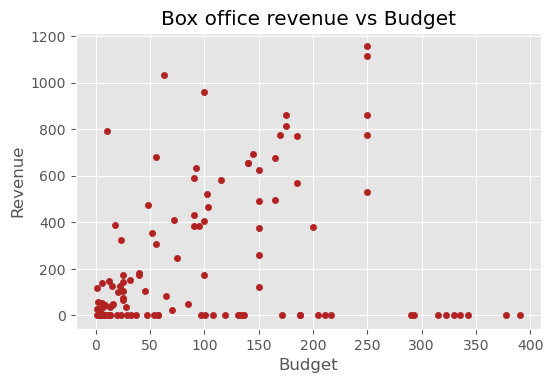

In [4]:
# Scatter plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

movies_budget.plot(
    x    = 'Budget',
    y    = 'Revenue',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Box office revenue vs Budget');

In [5]:
# Linear correlation
# ==============================================================================
corr_test = pearsonr(x = movies_budget['Budget'], y =  movies_budget['Revenue'])
print("Pearson correlation coefficient: ", corr_test[0])
print("P-value: ", corr_test[1])

Pearson correlation coefficient:  0.22621647261574213
P-value:  0.014614982449984255


The graph and the correlation test show a very slight linear relation, with a low intensity (`r` = 0.49) and high significance level (`p-value` = 0.01461498). Even though the correlation coefficient is low, we will proceed to generate a linear regression model so we can predict `Revenue` as a function of `Budget`.

## Model fitting

We will fit a linear regression model with `Revenue` as the response variable, and `Budget` as the predictor. To this end, we will split the data in two groups, a training set and a testing set. We will use the **Statsmodels** library. **Statsmodels** provides two ways of training the model:

- Giving a formula for the model and feeding it with a `DataFrame` for the training test that includes the response variable and the predictors. This is similar to the method used in **R**.

- Giving two matrices, a predictor matrix and a response matrix.

In [6]:
# Train-test splitting
# ==============================================================================
X = movies_budget[['Budget']]
y = movies_budget['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 512,
                                        shuffle      = True
                                    )

### Model fitting using a formula

#### With intercept

In [7]:
# Model fitting using a formula
# ==============================================================================
movies_budget_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Budget', 'Revenue'])
modelf = smf.ols(formula = 'Revenue ~ Budget', data = movies_budget_train)
modelf = modelf.fit()
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     5.798
Date:                Fri, 07 Jun 2024   Prob (F-statistic):             0.0181
Time:                        20:45:23   Log-Likelihood:                -657.67
No. Observations:                  92   AIC:                             1319.
Df Residuals:                      90   BIC:                             1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.0252     46.866      3.692      0.000      79.918     266.133
Budget         0.8074      0.335      2.408      0.018       0.141       1.473
==============================================================================
Omnibus:                        9.015   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.732
Skew:                           0.793   Prob(JB):                      0.00770
Kurtosis:                       2.845   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observe that `R^2` is very small, so we suspect that the intercept must be zero

#### Without intercept

In [8]:
# Model fitting using a formula
# ==============================================================================
movies_budget_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Budget', 'Revenue'])
modelf_noint = smf.ols(formula = 'Revenue ~ Budget + 0', data = movies_budget_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Revenue   R-squared (uncentered):                   0.341
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                              47.11
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                    7.98e-10
Time:                        20:45:23   Log-Likelihood:                         -664.15
No. Observations:                  92   AIC:                                      1330.
Df Residuals:                      91   BIC:                                      1333.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Budget         1.7005      0.248      6.864      0.000       1.208       2.193
==============================================================================
Omnibus:                        0.467   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.175
Skew:                           0.089   Prob(JB):                        0.916
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In effect, eliminating the intercept increases `R^2`.

### Model fitting using matrices

#### With intercept

In [9]:
# Model fitting using matrices
# ==============================================================================
# Add a column of 1s to the predictor matrix
X_train_int = sm.add_constant(X_train, prepend=True)
modelm = sm.OLS(endog=y_train, exog=X_train_int,)
modelm = modelm.fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     5.798
Date:                Fri, 07 Jun 2024   Prob (F-statistic):             0.0181
Time:                        20:45:23   Log-Likelihood:                -657.67
No. Observations:                  92   AIC:                             1319.
Df Residuals:                      90   BIC:                             1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.0252     46.866      3.692      0.000      79.918     266.133
x1             0.8074      0.335      2.408      0.018       0.141       1.473
==============================================================================
Omnibus:                        9.015   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.732
Skew:                           0.793   Prob(JB):                      0.00770
Kurtosis:                       2.845   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Without intercept

In [10]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.341
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                              47.11
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                    7.98e-10
Time:                        20:45:23   Log-Likelihood:                         -664.15
No. Observations:                  92   AIC:                                      1330.
Df Residuals:                      91   BIC:                                      1333.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7005      0.248      6.864      0.000       1.208       2.193
==============================================================================
Omnibus:                        0.467   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.175
Skew:                           0.089   Prob(JB):                        0.916
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The rest of our analysis will be based on the model without intercept.

## Confidence intervals for the coefficients

In [11]:
# Confidence intervals for the coefficients
# ==============================================================================
modelm_noint.conf_int(alpha=0.05)

array([[1.20837307, 2.19261962]])

## Residual analysis

In [12]:
# Residual analysis
# ==============================================================================
y_train = y_train.flatten()
prediction_train = modelm_noint.predict(exog = X_train)
residues_train   = prediction_train - y_train

In [13]:
residues_train.sum()

-7631.693757766727

In [14]:
residues_train.mean()

-82.95319301920355

In [15]:
residues_train.min(),residues_train.max()

(-925.8687303461103, 663.6571078833477)

We observe that the sum of residues is not zero.

### Graphs

C:\Users\jorge\AppData\Local\Temp\ipykernel_33460\3365456982.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


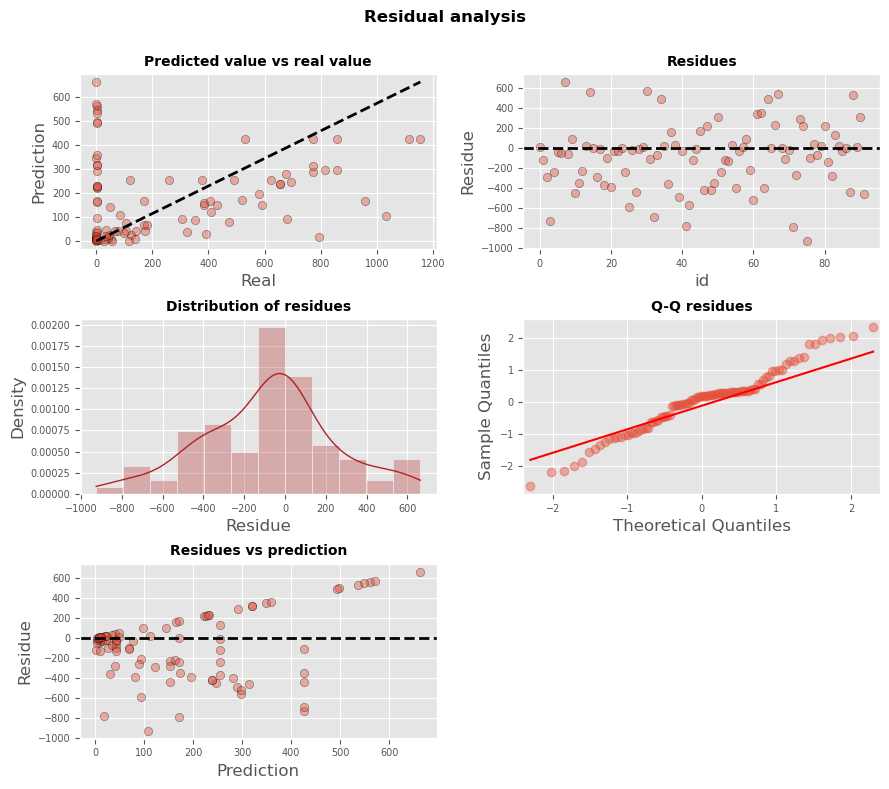

In [16]:
# Graphs
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residues', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residue')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residues_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of residues', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residue")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residues_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residues', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residues vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residue')
axes[2, 0].tick_params(labelsize = 7)

# Eliminate empty axes
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residual analysis', fontsize = 12, fontweight = "bold");

### Normality test

We now verify if the residues follow a normal distribution using to statistical tests: *Shapiro-Wilk test* and *D'Agostino's K-squared test*. The latter includes a summary from **Statsmodels** with the name *Omnibus*.

On both tests, the null hypothesis considers that the data follows a normal distribution. Hence, if the *$p$-value* is not smaller than the selected significance level *alpha* there is no evidence to reject the statement that the data is normally distributed.

In [17]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residues_train)
shapiro_test

ShapiroResult(statistic=0.9760574102401733, pvalue=0.0882439985871315)

In [18]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residues_train)
print(f"Statistic= {k2}, p-value = {p_value}")

Statistic= 0.46683742345656964, p-value = 0.7918219589627746


## Predictions

Now that we have trained our model, we can obtain predictions for new data. Models from **statsmodels** allow us to calculate predictions in two ways:

- `.predict()`: only gives predicted values.

- `.get_prediction().summary_frame()`: gives confidence intervals in addition to predicted values.

In [19]:
# Predictions with 95% confidence intervals
# ==============================================================================
#predictions = modelm_noint.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predictions = modelm_noint.fittedvalues
predictions

array([ 12.86152894, 255.07445156, 122.43573675, 425.12408593,
       153.04467093,  42.51240859,  10.20297806, 663.71239888,
         3.06089342, 144.54218922, 246.57196984, 425.12408593,
       161.54715265,  20.38963306, 561.59262799,   9.0492049 ,
        39.11141591, 170.04963437, 255.07445156,  25.50744516,
       195.55707953,  13.60397075,  11.90347441,   2.38069488,
       255.07445156,  93.5272989 ,  27.2079415 , 425.12408593,
         5.10148903,  10.3730277 , 570.43372785,  68.01985375,
       425.12408593,  42.51240859, 497.52474985,  22.41642064,
        30.60893419, 164.77608572,  39.69225104, 289.08437843,
         3.74109196,  17.85521161, 297.58686015,   1.63247649,
       255.07445156, 170.26328983, 238.06948812, 222.32786083,
       238.06948812, 173.45062706, 319.72735145, 170.04963437,
        68.01985375,  10.20297806,  33.16178392, 280.58189671,
        76.52233547,  47.61389762,  97.43844049,  93.5272989 ,
       297.58686015, 348.33536771, 358.14113023,  81.62

## Graphical representation

Now, we plot the least-squares regression line, as well as upper and lower limits for confidence intervals. With this graph it is possible to identify a region for the *mean* value of the response variable.

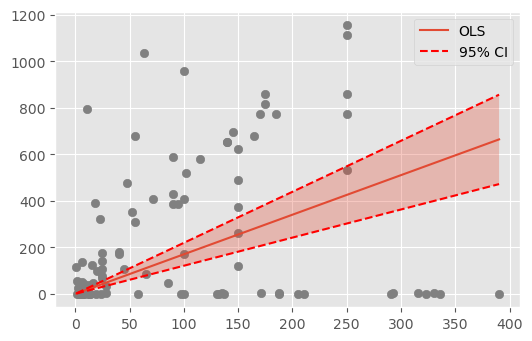

In [20]:
# Predictions with 95% confidence intervals
# ==============================================================================
predictions = modelm_noint.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predictions['x'] = X_train[:, 0]
predictions['y'] = y_train
predictions = predictions.sort_values('x')

# Graph
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predictions['x'], predictions['y'], marker='o', color = "gray")
ax.plot(predictions['x'], predictions["mean"], linestyle='-', label="OLS")
ax.plot(predictions['x'], predictions["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predictions['x'], predictions["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predictions['x'], predictions["mean_ci_lower"], predictions["mean_ci_upper"], alpha=0.3)
ax.legend();

## Model error test

In [21]:
# Model error test
# ==============================================================================
#X_test = sm.add_constant(X_test, prepend=False)
predictions = modelm_noint.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print("")
print(f"The test error (rmse) is: {rmse}")


The test error (rmse) is: 247.30529456363166


c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
movies_budget['Revenue'].min(),movies_budget['Revenue'].mean(),movies_budget['Revenue'].max()

(0.042004, 230.49580347413794, 1155.046416)

## Interpreting the results

The `coef` column gives the estimated value for both of the parameters of the linear model ($\hat{\beta}_0$ and $\hat{\beta}_1$). These correspond to the intercept and the slope of the line. Standard errors, $t$-statistic value and $p$-value for each of the parameters is also shown. This allows us to determine if the predictors are significantly different than 0, that is, they are important for the model. We see that such *$p$-values* are smaller than $0.05$.

`R-squared` indicates that the model is able to explain $34\%$ of the observerd variability for the response variable. Furthermore, the *$p$-value* obtained in the F-test (`Prob (F-statistic) = 5.69e-30`) indicates that there is sufficient evidence that the variance explained by the model is greater than that of random chance.

So, the linear model thus generated follows the equation:

$$\text{Revenue} = 2.9515\times\text{Budget}$$
 
For each dollar invested in the movie, $2.95$ dollars are recovered **on average**

The model error test is very big, $239.03$, so the model predictions get farther from the real value by $239.03$ **on average**.

Adding to the interpretation provided, the model is not good. It makes sense that the model is not good at all because we are only taking a one variables. The rmse is 247 which is huge which means that our predictions are not close to the real value. We did the multiple linear regresion before this activity so a better explanation is in the next activiy (that's the main reason we know this model is not good).


## References

Regresión lineal con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html